In [1]:
#Importing Libraries
import ast
import pandas as pd
import seaborn as sns
from datasets import load_dataset
import matplotlib.pyplot as plt

#Loading Data
dataset = load_dataset("lukebarousse/data_jobs")
df = dataset["train"].to_pandas()

#Data Cleanup
df["job_posted_date"] = pd.to_datetime(df["job_posted_date"])
df["job_skills"] = df["job_skills"].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [3]:
df_DA_GR = df[(df["job_title_short"] == "Data Analyst") & (df["job_country"] == "Greece")].copy()

In [6]:
df_DA_GR = df_DA_GR.dropna(subset=["salary_year_avg"])

df_DA_GR_exploded = df_DA_GR.explode("job_skills")

df_DA_GR_exploded[["salary_year_avg", "job_skills"]].head(5)

,salary_year_avg,job_skills
58901,89100.0,python
58901,89100.0,sql
58901,89100.0,databricks
58901,89100.0,spark
58901,89100.0,tableau


In [28]:
df_DA_skills = df_DA_GR_exploded.groupby("job_skills")["salary_year_avg"].agg(["count", "median"]).sort_values(by="count", ascending=False)

df_DA_skills = df_DA_skills.rename(columns={"count": "skill_count", "median": "median_salary"})

DA_job_count = len(df_DA_GR )

df_DA_skills["skill_percent"] = df_DA_skills["skill_count"] / DA_job_count * 100

skill_percent = 5

df_DA_skills_high_demand = df_DA_skills[df_DA_skills["skill_percent"] > skill_percent]

df_DA_skills_high_demand


,skill_count,median_salary,skill_percent
job_skills,,,
python,8,119500.0,50.00
sql,8,98500.0,50.00
power bi,4,98500.0,25.00
flow,4,94800.0,25.00
tableau,4,81000.0,25.00
java,3,140904.5,18.75
azure,3,98500.0,18.75
excel,2,76757.0,12.50
sas,2,98500.0,12.50


11 [-0.44023595  0.31028418]
23 [-0.36467848 -0.57252249]


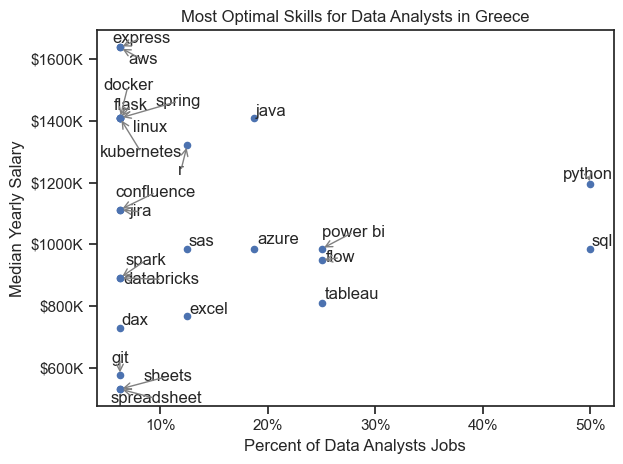

In [88]:
from adjustText import adjust_text

df_DA_skills_high_demand.plot(kind="scatter", x="skill_percent", y="median_salary")

# Prepere texts for adjustText
texts = []
for i, txt in enumerate(df_DA_skills_high_demand.index):
    texts.append(plt.text(df_DA_skills_high_demand["skill_percent"].iloc[i], df_DA_skills_high_demand["median_salary"].iloc[i], txt))


texts[df_DA_skills_high_demand.index.get_loc("jira")].set_y(
texts[df_DA_skills_high_demand.index.get_loc("jira")].get_position()[1] - 30
)
texts[df_DA_skills_high_demand.index.get_loc("aws")].set_y(
texts[df_DA_skills_high_demand.index.get_loc("aws")].get_position()[1] - 30
)
texts[df_DA_skills_high_demand.index.get_loc("kubernetes")].set_y(
texts[df_DA_skills_high_demand.index.get_loc("kubernetes")].get_position()[1] - 28
)

# Adjust text to avoid overlab
adjust_text(texts, expand_text=(1.2, 1.4), force_points=1.2, arrowprops=dict(arrowstyle="->", color="gray"))

# Set axis, label, title and legend
plt.xlabel("Percent of Data Analysts Jobs")
plt.ylabel("Median Yearly Salary")
plt.title("Most Optimal Skills for Data Analysts in Greece")

from matplotlib.ticker import PercentFormatter
ax = plt.gca()
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, pos: f'${int(y/100)}K'))
ax.xaxis.set_major_formatter(PercentFormatter(decimals=0))

# Adjust layout and display plot
plt.tight_layout()
plt.show()

In [ ]:
from matplotlib.ticker import PercentFormatter

df_plot = df_DA_GR.iloc[:, :5]
sns.lineplot(data=df_plot, dashes=False, palette="tab10")
sns.despine()
sns.set_theme(style="ticks")

plt.title("Trending Top Skills for Data Analysts in Greece")
plt.ylabel("Likelihood in Job Posting")
plt.xlabel("2025")
plt.legend().remove()
plt.gca().yaxis.set_major_formatter(PercentFormatter(decimals=0))

# annotate the plot with the top 5 skills using plt.text()
for i in range(5):
    plt.text(11.2, df_plot.iloc[-1, 1], df_plot.columns[i], color="black")

plt.show()

In [25]:
df_technology = df['job_type_skills'].copy()

# remove duplicates
df_technology = df_technology.drop_duplicates()

# remove NaN values
df_technology = df_technology.dropna()

# combine all dictionaries into one
technology_dict = {}
for row in df_technology:
    row_dict = ast.literal_eval(row)  # convert string to dictionary
    for key, value in row_dict.items():
        if key in technology_dict:  # if key already exists in technology_dict, add value to existing value
            technology_dict[key] += value
        else:                       # if key does not exist in technology_dict, add key and value
            technology_dict[key] = value

# remove duplicates by converting values to set then back to list
for key, value in technology_dict.items():
    technology_dict[key] = list(set(value))

technology_dict


{'analyst_tools': ['esquisse',
  'tableau',
  'ssrs',
  'powerbi',
  'looker',
  'ssis',
  'sheets',
  'word',
  'qlik',
  'datarobot',
  'powerpoint',
  'sap',
  'ms access',
  'splunk',
  'alteryx',
  'spss',
  'nuix',
  'spreadsheet',
  'power bi',
  'sas',
  'cognos',
  'outlook',
  'sharepoint',
  'msaccess',
  'dax',
  'microstrategy',
  'visio',
  'excel'],
 'programming': ['c#',
  'python',
  'javascript',
  'php',
  'clojure',
  'rust',
  'lua',
  'powershell',
  'ocaml',
  'visualbasic',
  't-sql',
  'crystal',
  'sass',
  'bash',
  'dart',
  'go',
  'ruby',
  'julia',
  'html',
  'swift',
  'shell',
  'mongo',
  'assembly',
  'css',
  'visual basic',
  'kotlin',
  'fortran',
  'cobol',
  'elixir',
  'nosql',
  'perl',
  'matlab',
  'apl',
  'objective-c',
  'pascal',
  'lisp',
  'sas',
  'typescript',
  'c++',
  'haskell',
  'solidity',
  'vba',
  'golang',
  'no-sql',
  'mongodb',
  'c',
  'erlang',
  'java',
  'groovy',
  'r',
  'scala',
  'f#',
  'delphi',
  'vb.net',
  '

In [27]:
df_technology = pd.DataFrame(list(technology_dict.items()), columns=["technology", "skills"])

df_technology = df_technology.explode("skills")

df_technology


,technology,skills
0,analyst_tools,esquisse
0,analyst_tools,tableau
0,analyst_tools,ssrs
0,analyst_tools,powerbi
0,analyst_tools,looker
...,...,...
9,sync,twilio
9,sync,zoom
9,sync,wire
9,sync,unify


In [30]:
df_plot = df_DA_skills_high_demand.merge(df_technology, left_on="job_skills", right_on="skills")

11 [ 0.07166633 -0.28773881]
23 [0.38250886 0.71359109]


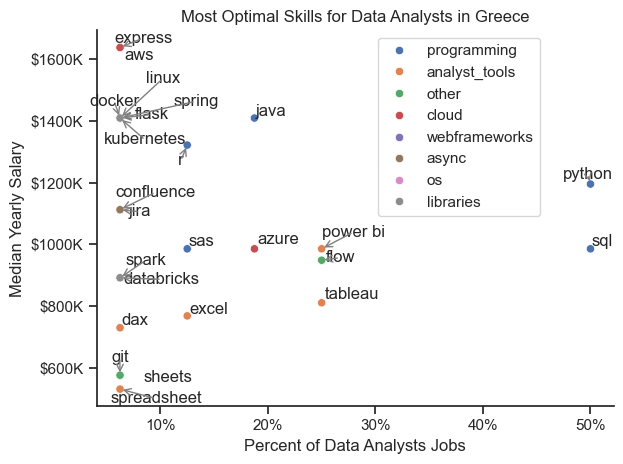

In [87]:
from adjustText import adjust_text

# df_plot.plot(kind="scatter", x="skill_percent", y="median_salary")
sns.scatterplot(
    data=df_plot,
    x="skill_percent",
    y="median_salary",
    hue="technology"
)

sns.despine()
sns.set_theme(style="ticks")

# Prepere texts for adjustText
texts = []
for i, txt in enumerate(df_DA_skills_high_demand.index):
    texts.append(plt.text(df_DA_skills_high_demand["skill_percent"].iloc[i], df_DA_skills_high_demand["median_salary"].iloc[i], txt))


texts[df_DA_skills_high_demand.index.get_loc("confluence")].set_y(
texts[df_DA_skills_high_demand.index.get_loc("confluence")].get_position()[1] + 30
)
texts[df_DA_skills_high_demand.index.get_loc("aws")].set_y(
texts[df_DA_skills_high_demand.index.get_loc("aws")].get_position()[1] - 30
)
texts[df_DA_skills_high_demand.index.get_loc("kubernetes")].set_y(
texts[df_DA_skills_high_demand.index.get_loc("kubernetes")].get_position()[1] - 28
)



# Adjust text to avoid overlab
adjust_text(texts, expand_text=(1.2, 1.4), force_points=1.2, arrowprops=dict(arrowstyle="->", color="gray"))


# Set axis, label, title and legend
plt.xlabel("Percent of Data Analysts Jobs")
plt.ylabel("Median Yearly Salary")
plt.title("Most Optimal Skills for Data Analysts in Greece")
plt.legend(loc="upper center", bbox_to_anchor=(0.7, 1))



from matplotlib.ticker import PercentFormatter
ax = plt.gca()
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, pos: f'${int(y/100)}K'))
ax.xaxis.set_major_formatter(PercentFormatter(decimals=0))

# Adjust layout and display plot
plt.tight_layout()
plt.show()